In [1]:
import os
import opendatasets as od

In [2]:
# downloading the datasets
od.download('https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: Downloading pimaindiansdiabetescsv.zip to ./pimaindiansdiabetescsv


100%|██████████| 8.89k/8.89k [00:00<00:00, 29.0kB/s]

In [5]:
os.listdir()

['.ipynb_checkpoints', 'pimaindiansdiabetescsv', 'rf-classifier.ipynb']

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 120

In [2]:
df = pd.read_csv('pimaindiansdiabetescsv/pima-indians-diabetes.csv')

df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


> - The dataset has been successfully fetched but the column names are missing. 

> - As per the documentation of the dataset, the nine columns are such as:
    
    6   : pregnancy
    148 : Glucose (plasma glucose concentration)
    72  : Blood pressure (in mm Hg)
    35  : skin thickness (in mm)
    0   : Insulin (serum insulin in mu U/ml)
    33.6: Body mass index (BMI - weight in kg/(height in m)^2)
    0.627: Diabetes pedigree function (genetic history)
    50  : Age (in years)
    1   : class - whether a patient is diabetic of not (0:Non-diabetic or 1:Diabetic)

> - First we will change the dataset's column names. Then we will do EDA


In [3]:
df.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [4]:
# renaming columns

df.rename(columns={
    '6': 'pregnancy',
    '148': 'glucose',
    '72': 'blood_pressure',
    '35': 'skin_thickness',
    '0': 'insulin',
    '33.6': 'bmi',
    '0.627': 'diabetes_pedigree',
    '50': 'age',
    '1': 'Diabetes', # 1: yes, 0: no
}, inplace=True)

In [5]:
df.head(10)

,pregnancy,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [6]:
# Shape of dataset
df.shape

(767, 9)

In [7]:
# checking for missing values
df.isnull().sum()

pregnancy            0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
Diabetes             0
dtype: int64

In [8]:
# checking for duplicate value
df.duplicated().any()

False

In [9]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancy          767 non-null    int64  
 1   glucose            767 non-null    int64  
 2   blood_pressure     767 non-null    int64  
 3   skin_thickness     767 non-null    int64  
 4   insulin            767 non-null    int64  
 5   bmi                767 non-null    float64
 6   diabetes_pedigree  767 non-null    float64
 7   age                767 non-null    int64  
 8   Diabetes           767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# description

df.describe().round(2)

,pregnancy,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Diabetes
count,767.00,767.00,767.00,767.00,767.00,767.00,767.00,767.00,767.00
mean,3.84,120.86,69.10,20.52,79.90,31.99,0.47,33.22,0.35
std,3.37,31.98,19.37,15.95,115.28,7.89,0.33,11.75,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,32.00,32.00,0.37,29.00,0.00
75%,6.00,140.00,80.00,32.00,127.50,36.60,0.62,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


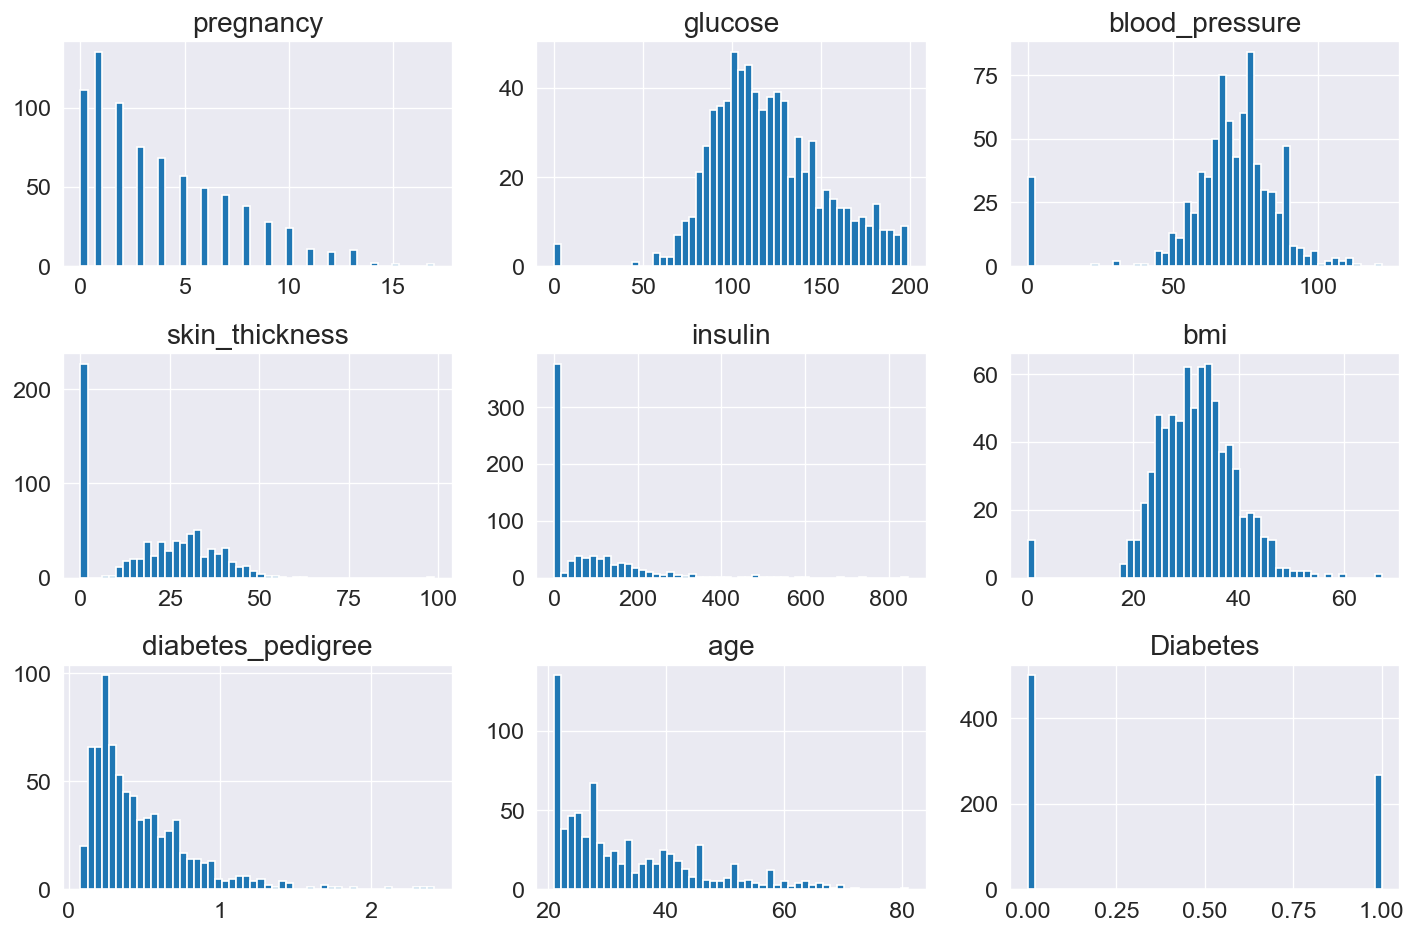

In [12]:
df.hist(bins=50)
plt.tight_layout()
plt.show()

- The dataset show no missing value, but there are some missing values present in form of 0.
- By closely looking at the above description table, the glucose level, blood pressure, skin thickness, insulin columns has minimum value 0, those are the missing values.
- For the EDA purpose let's replace the missing values with 'NaN'.

In [13]:
# replacing missing values

new_df = df.replace(to_replace={
    'glucose':{0:np.nan},
    'skin_thickness':{0:np.nan},
    'blood_pressure':{0:np.nan},
    'age':{0:np.nan},
    'insulin':{0:np.nan},
    'bmi':{0:np.nan}
})

In [14]:
new_df.describe()

,pregnancy,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Diabetes
count,767.000000,762.000000,732.000000,540.000000,394.000000,756.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.540786,12.390616,10.483667,118.775855,6.929448,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,36.000000,190.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


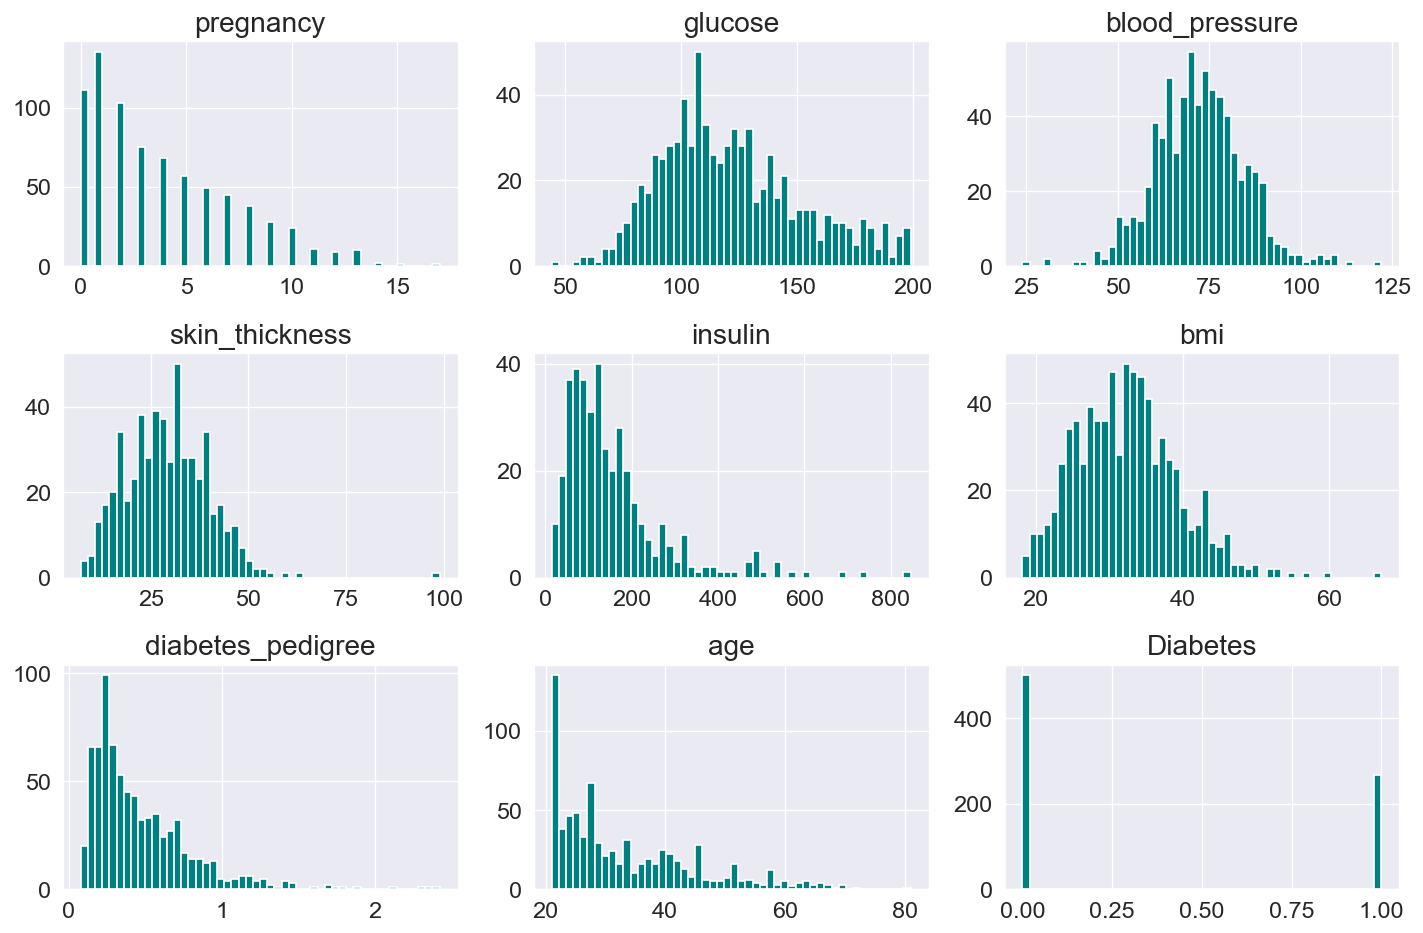

In [16]:
new_df.hist(bins=50, color='teal')
plt.tight_layout()
plt.show()

In [17]:
# co-relation matrix table

new_df.corr().round(2)

,pregnancy,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,Diabetes
pregnancy,1.00,0.13,0.21,0.10,0.08,0.02,-0.03,0.54,0.22
glucose,0.13,1.00,0.22,0.23,0.58,0.23,0.14,0.27,0.49
blood_pressure,0.21,0.22,1.00,0.23,0.10,0.29,-0.00,0.33,0.17
skin_thickness,0.10,0.23,0.23,1.00,0.18,0.65,0.11,0.17,0.26
insulin,0.08,0.58,0.10,0.18,1.00,0.23,0.13,0.22,0.30
bmi,0.02,0.23,0.29,0.65,0.23,1.00,0.16,0.03,0.31
diabetes_pedigree,-0.03,0.14,-0.00,0.11,0.13,0.16,1.00,0.03,0.17
age,0.54,0.27,0.33,0.17,0.22,0.03,0.03,1.00,0.24
Diabetes,0.22,0.49,0.17,0.26,0.30,0.31,0.17,0.24,1.00


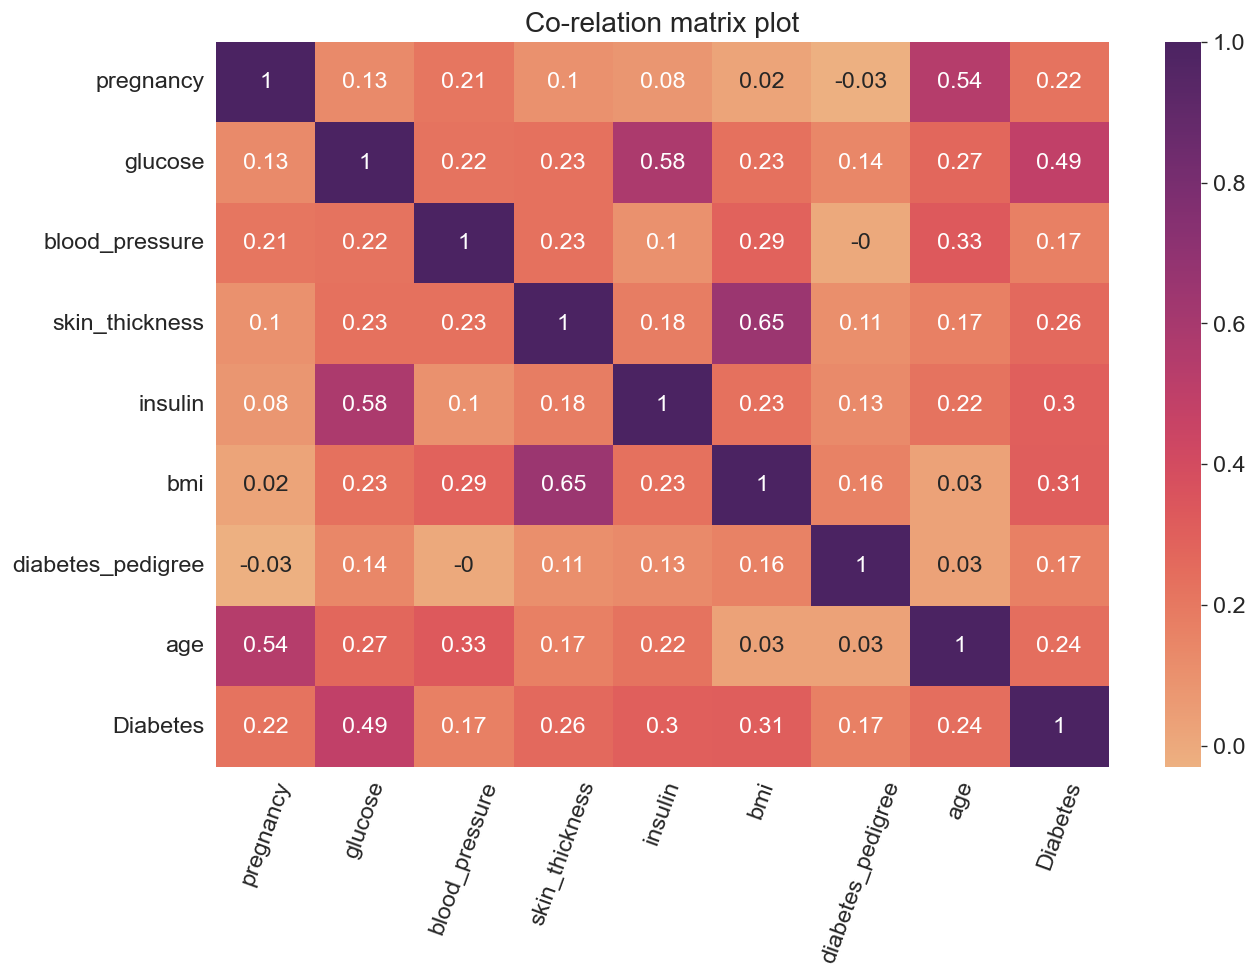

In [18]:
# co-relation matrix plot

sns.heatmap(new_df.corr().round(2), annot=True, cmap='flare')
plt.title('Co-relation matrix plot')
plt.xticks(rotation=70)
plt.show();

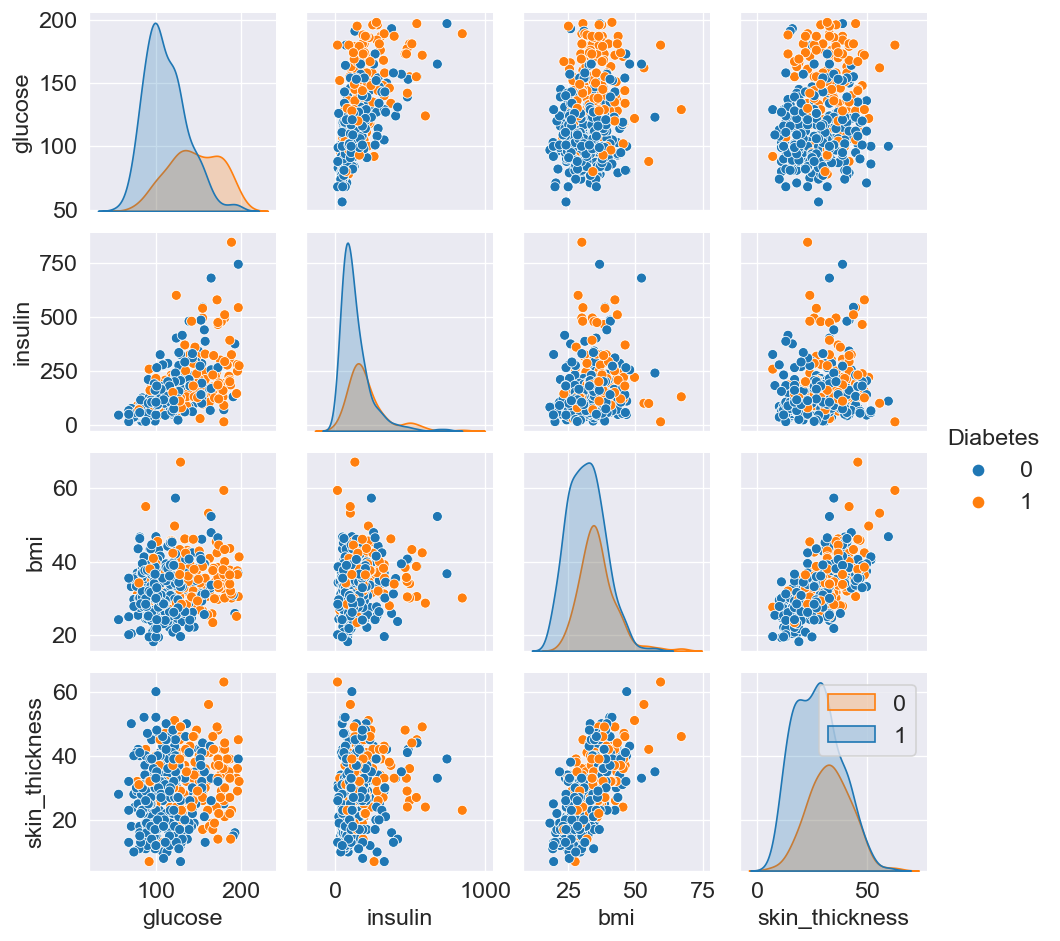

In [20]:
# scatterplot

sns.pairplot(
    new_df.dropna(), 
    vars=['glucose', 'insulin', 'bmi', 'skin_thickness'], 
    height=2.0,
    diag_kind='kde',
    hue='Diabetes')
plt.legend(new_df.Diabetes)
plt.show();

### Insights from the dataset:

-----

- The dataset has 797 rows and 9 columns.
- The dataset has missing values and they are replaced with NaN.
- From the above co-relation matrix plot and table:
    - Pregnancy has a high co-relation with age. With age the number of pregnancy increases.
    - Glucose level has a high co-relation with insulin and class.
    - Skin thickness is highly co-related to body mass index

In [21]:
new_df.columns

Index(['pregnancy', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age', 'Diabetes'],
      dtype='object')

In [22]:
new_df.Diabetes.value_counts()

0    500
1    267
Name: Diabetes, dtype: int64

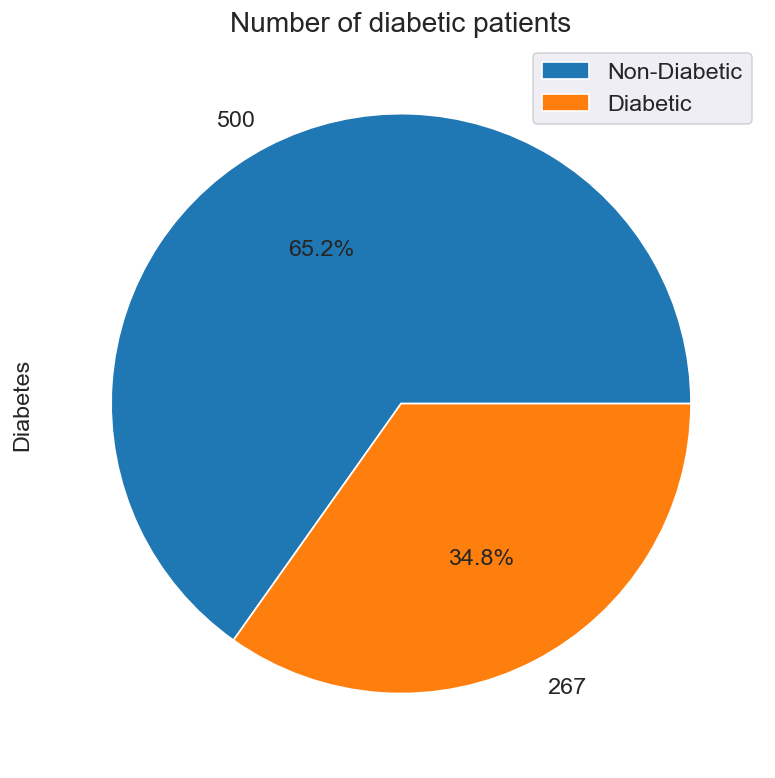

In [23]:
label = [new_df.Diabetes.value_counts()[0], new_df.Diabetes.value_counts()[1]]
new_df.Diabetes.value_counts().plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('Number of diabetic patients')
plt.legend(['Non-Diabetic', 'Diabetic'], loc='best')
plt.show();

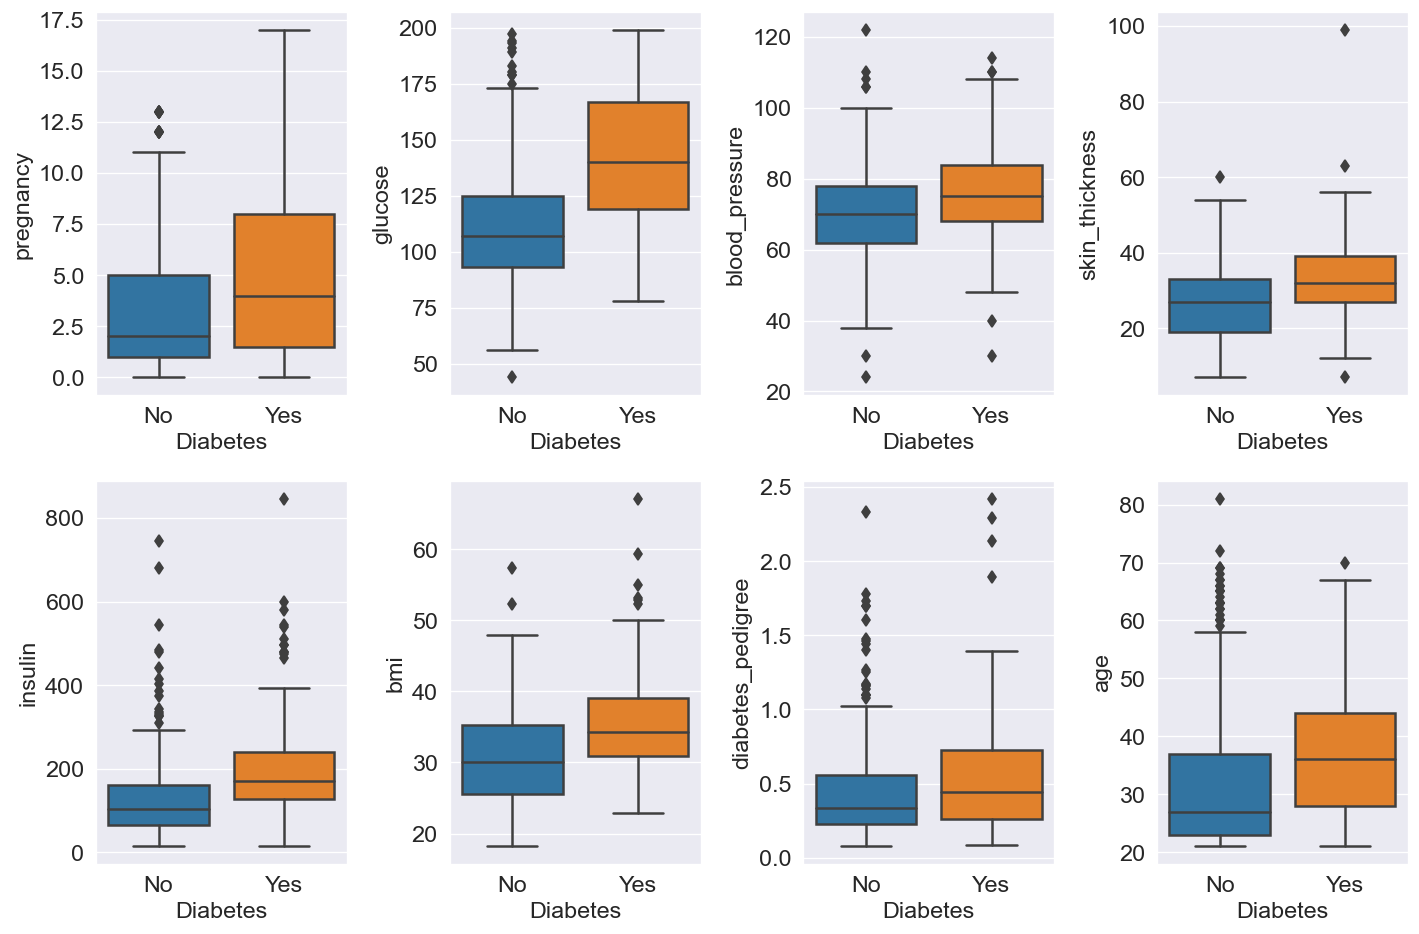

In [25]:
# Box plots

for i in range(new_df.shape[1]-1):
    plt.subplot(2,4, i+1)
    sns.boxplot(x='Diabetes', y=new_df.columns[i], data=new_df)
    plt.xticks([0,1], ['No','Yes'])

plt.tight_layout()
plt.show()


## Preprocessing

In [26]:
# pre-processing the dataset

# Diabetes (class) is the target here

# split the target from the input values

X = new_df.drop('Diabetes', axis=1)
y = new_df.Diabetes

In [27]:
# importing the necessary sklearn packages

from sklearn.model_selection import train_test_split # to split the dataset into train and test model
from sklearn.preprocessing import StandardScaler # to normalize the data
from sklearn.impute import SimpleImputer # to handle outliers

In [28]:
# Handling outliers with median

impute = SimpleImputer(missing_values=np.nan, strategy='median')
X_cleaned = impute.fit_transform(X)

In [29]:
# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

In [30]:
# Splitting the train and test data

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# shape of training
#  and testing dataset
print('Shape of the training feature:', X_train.shape)
print('Shape of the testing feature:', X_test.shape)
print('Shape of the training label:', y_train.shape)
print('Shape of the testing feature:', y_test.shape)

Shape of the training feature: (613, 8)
Shape of the testing feature: (154, 8)
Shape of the training label: (613,)
Shape of the testing feature: (154,)


# Applying ML 

In [31]:
# importing machine learning models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

## Random Forest Model

In [32]:
# create classifier
classifier = RandomForestClassifier(n_estimators=100)

# Training the model Using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Prediction on the test set
y_pred = classifier.predict(X_test)

In [34]:
# Calculating the model accuracy
rf_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the random forest model: ', round(rf_accuracy*100, 2))

Accuracy of the random forest model:  71.43


In [35]:
# Important features
imp_features = pd.DataFrame({
    'feature': list(X.columns),
    'importance': classifier.feature_importances_
}).sort_values('importance', ascending=False)

imp_features

,feature,importance
1,glucose,0.257073
5,bmi,0.157622
7,age,0.127134
6,diabetes_pedigree,0.126045
4,insulin,0.089698
0,pregnancy,0.088841
2,blood_pressure,0.084333
3,skin_thickness,0.069254


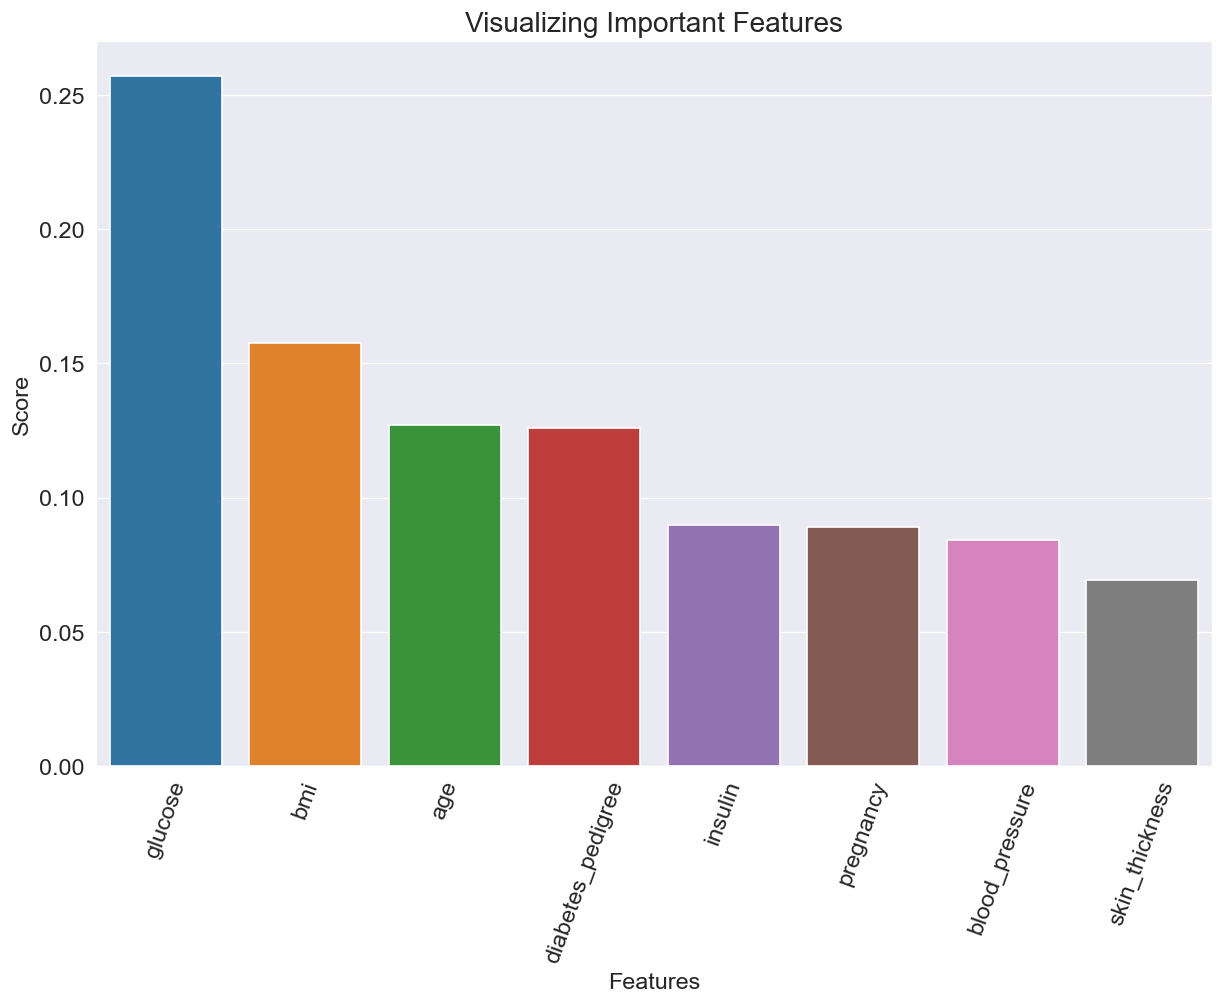

In [36]:
sns.barplot(x=imp_features.feature, y=imp_features.importance)
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Visualizing Important Features')
plt.xticks(rotation=70)
plt.show()

In [37]:
# skin thickness is less contributing feature
# Let's remove it and train the model again

X,y = new_df.drop(['Diabetes','skin_thickness'], axis=1), new_df.Diabetes

In [38]:
impute = SimpleImputer(missing_values=np.nan, strategy='median')
X_cleaned = impute.fit_transform(X)

# normalizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)


# Spliting into train test set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)

In [39]:
classifier2 = RandomForestClassifier(n_estimators=100)
classifier2.fit(X_train, y_train)

# prediction
y_pred = classifier2.predict(X_test)

# accuracy 
rf2_accuracy = accuracy_score(y_test, y_pred)

print('The new RF model has accuracy of:', round(rf2_accuracy*100,2))

The new RF model has accuracy of: 73.38


## Logistic Regression Model

In [40]:
# creating logistic regression classifier
clf = LogReg()

# fit into the dataset
clf.fit(X_train,y_train)

LogisticRegression()

In [41]:
# prediction
y_pred = clf.predict(X_test)

In [42]:
train_predict = clf.predict(X_train)

In [43]:
k = f1_score(train_predict, y_train)

print('Training f1 score: ', k)

Training f1 score:  0.6736842105263159


In [44]:
# Calculating f1-score
k = f1_score(y_pred, y_test)

print('Test f1_score: ', k)

Test f1_score:  0.4742268041237113


In [46]:
# Predicting over the training data

train_predict = clf.predict_proba(X_train)

Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[80 20]
 [31 23]]


In [48]:
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       100
           1       0.53      0.43      0.47        54

    accuracy                           0.67       154
   macro avg       0.63      0.61      0.62       154
weighted avg       0.66      0.67      0.66       154



In [56]:
# Coefficients

Coefficients = pd.DataFrame({
    'Variables': X.columns,
    'coefficient': abs(clf.coef_.reshape(-1))
})

Coefficients.head()

,Variables,coefficient
0,pregnancy,0.521137
1,glucose,1.196519
2,blood_pressure,0.001594
3,insulin,0.032387
4,bmi,0.696748


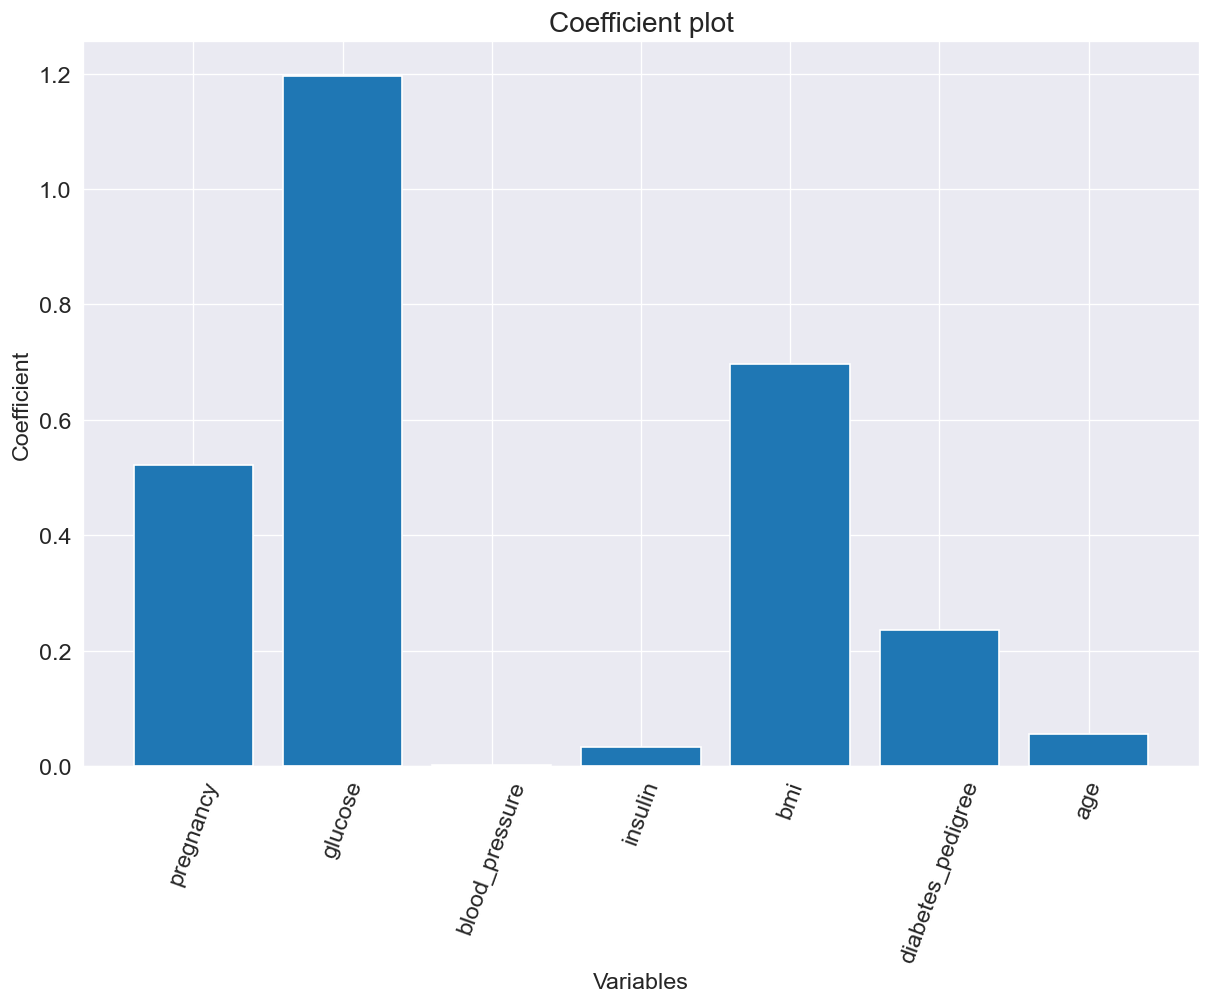

In [67]:
x = range(len(X.columns))
c = clf.coef_.reshape(-1)
plt.bar(Coefficients.Variables, Coefficients.coefficient)
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.xticks(rotation=70)
plt.title('Coefficient plot')
plt.show()